# Análise de Vendas

### - Como foi a venda nesse período?
### - Qual foi a categoria mais vendida?
### - Qual foi o item mais vendido?

In [125]:
#Importando as bibliotecas e a base
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
base = pd.read_csv(r'C:\Users\cacam\Downloads\Criando uma apresentação executiva.csv')

In [126]:
#Visualizando a base
display(base)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [127]:
#Visualizando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Apenas código postal possui valores nulos

In [128]:
#Verificando os registros com Postal Code vazio
base[base['Postal Code'].isnull()].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04


In [129]:
#Verificando se existe algum registro de Burlington, Vermont com Postal Code
base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Não chegou informação de código postal para Burlington, Vermont (usando o google para atualizar as informações)

In [130]:
#Atualizando as informações
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') &  base['Postal Code'].isnull(), 'Postal Code'] = 5401

#### - Como foi a venda nesse período

In [131]:
#Convertendo as colunas de data para datetime
base['Order Date'] = pd.to_datetime(base['Order Date'], format = '%d/%m/%Y')

In [132]:
base['Ship Date'] = pd.to_datetime(base['Ship Date'], format = '%d/%m/%Y')

In [133]:
#erificando o período
print(base['Order Date'].min())
print(base['Order Date'].max())

2015-01-03 00:00:00
2018-12-30 00:00:00


- Período 4 de anos(Jan/2015 até Dez/2018)

## Vendas por Ano

In [134]:
#Criando uma coluna com o ano
base['Ano'] = base['Order Date'].dt.year

In [135]:
#Verificando as vendas
base.groupby('Ano')['Sales'].sum()

Ano
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

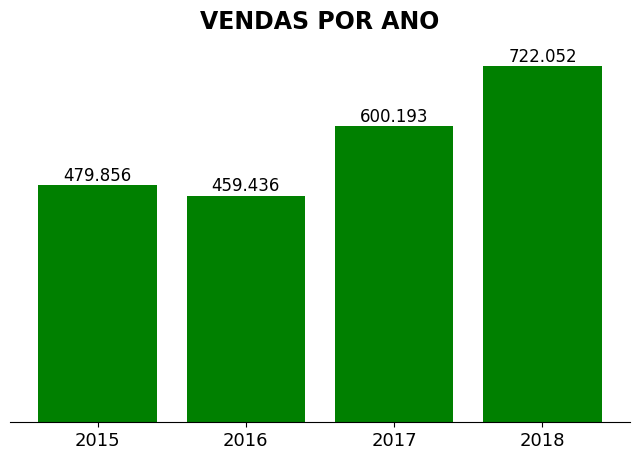

In [136]:
soma_ano = base.groupby('Ano')['Sales'].sum()

fig, ax = plt.subplots(figsize = (8, 5))

ax.set_title('VENDAS POR ANO', fontsize = 17, fontweight = 'bold')

ax.xaxis.set_ticks([2015, 2016, 2017, 2018])

ax.tick_params(axis = 'x', labelsize = 13) 
 
ax.bar(soma_ano.index, soma_ano.values, color = 'g')

for i in range(0, 4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'),
               (soma_ano.index[i], soma_ano.values[i]),
               ha = 'center',
               xytext = (0, 3), textcoords = 'offset points',
               fontsize = 12
               )
    
ax.set_yticks([0, 780000])
ax.yaxis.set_visible(False)

#Retirando bordas
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

## Vendas por Mês

In [137]:
#Criando uma coluna com o mês
base['Mes'] = base['Order Date'].dt.month

In [138]:
#Verificando as vendas
soma_mes = base.groupby(['Mes', 'Ano'])['Sales'].sum()

In [139]:
soma_mes.head()

Mes  Ano 
1    2015    14205.7070
     2016    18066.9576
     2017    18542.4910
     2018    43476.4740
2    2015     4519.8920
Name: Sales, dtype: float64

In [140]:
soma_mes.index

MultiIndex([( 1, 2015),
            ( 1, 2016),
            ( 1, 2017),
            ( 1, 2018),
            ( 2, 2015),
            ( 2, 2016),
            ( 2, 2017),
            ( 2, 2018),
            ( 3, 2015),
            ( 3, 2016),
            ( 3, 2017),
            ( 3, 2018),
            ( 4, 2015),
            ( 4, 2016),
            ( 4, 2017),
            ( 4, 2018),
            ( 5, 2015),
            ( 5, 2016),
            ( 5, 2017),
            ( 5, 2018),
            ( 6, 2015),
            ( 6, 2016),
            ( 6, 2017),
            ( 6, 2018),
            ( 7, 2015),
            ( 7, 2016),
            ( 7, 2017),
            ( 7, 2018),
            ( 8, 2015),
            ( 8, 2016),
            ( 8, 2017),
            ( 8, 2018),
            ( 9, 2015),
            ( 9, 2016),
            ( 9, 2017),
            ( 9, 2018),
            (10, 2015),
            (10, 2016),
            (10, 2017),
            (10, 2018),
            (11, 2015),
            (11,

- Temos um MultiIndex, então temos que transformar os índices em colunas e aplicar todas as propriedades que conhecemos para DataFrame

In [141]:
#Transformando índices em colunas
soma_mes = soma_mes.reset_index()

In [142]:
#Visualizando novamente a base
soma_mes.head()

,Mes,Ano,Sales
0,1,2015,14205.7070
1,1,2016,18066.9576
2,1,2017,18542.4910
3,1,2018,43476.4740
4,2,2015,4519.8920


In [143]:
#Filtrando DataFrame
soma_mes[soma_mes.Ano == 2015].Mes.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

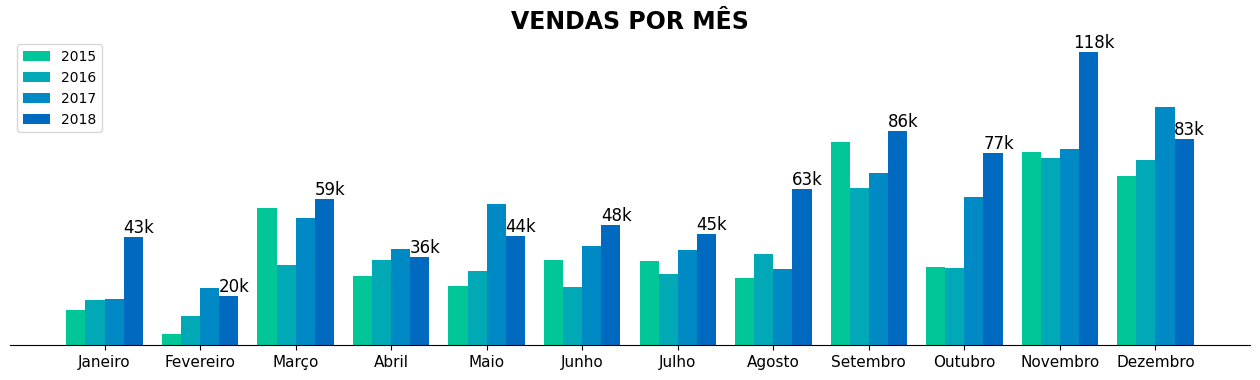

In [144]:
#Criando gráfico
fig, ax = plt.subplots(figsize = (16, 4))
w = 0.2

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values - w - w/2, soma_mes[soma_mes.Ano == 2015].Sales.values, width = w, 
       color = '#00c698', label = 2015)
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values - w/2, soma_mes[soma_mes.Ano == 2016].Sales.values, width = w, 
       color = '#00a9b5', label = 2016)
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values + w/2, soma_mes[soma_mes.Ano == 2017].Sales.values, width = w, 
       color = '#008ac5', label = 2017)
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values + w + w/2, soma_mes[soma_mes.Ano == 2018].Sales.values, width = w, 
       color = '#0069c0', label = 2018)

for i in range(0, 12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000),
               (soma_mes[soma_mes.Ano == 2018].Mes.values[i] + w + w/2, soma_mes[soma_mes.Ano == 2018].Sales.values[i]),
               ha = 'center',
               xytext = (4, 3), textcoords = 'offset points',
               fontsize = 12)
    
ax.set_yticks([0, 1000])
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('VENDAS POR MÊS', fontsize = 17, fontweight = 'bold')

ax.xaxis.set_ticks(np.arange(1, 13))
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 
                     'Outubro', 'Novembro', 'Dezembro'])
ax.tick_params(axis = 'x', labelsize = 11)

plt.legend()
plt.show()

#### - Categoria mais vendida

In [145]:
#Entendendo as informações de categoria
categoria_vendas = base.groupby(['Category', 'Ano'])['Sales'].sum()

In [146]:
#Entendendo como foram essas categorias em cada um dos anos
categoria_ano = base.groupby(['Category', 'Ano'])['Sales'].sum()

In [147]:
categoria = categoria_ano.reset_index()
categoria.head()

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200


In [148]:
categoria[categoria.Category == 'Furniture'].Sales.values

array([156477.8811, 164053.8674, 195813.04  , 212313.7872])

In [149]:
categoria.Category

0           Furniture
1           Furniture
2           Furniture
3           Furniture
4     Office Supplies
5     Office Supplies
6     Office Supplies
7     Office Supplies
8          Technology
9          Technology
10         Technology
11         Technology
Name: Category, dtype: object

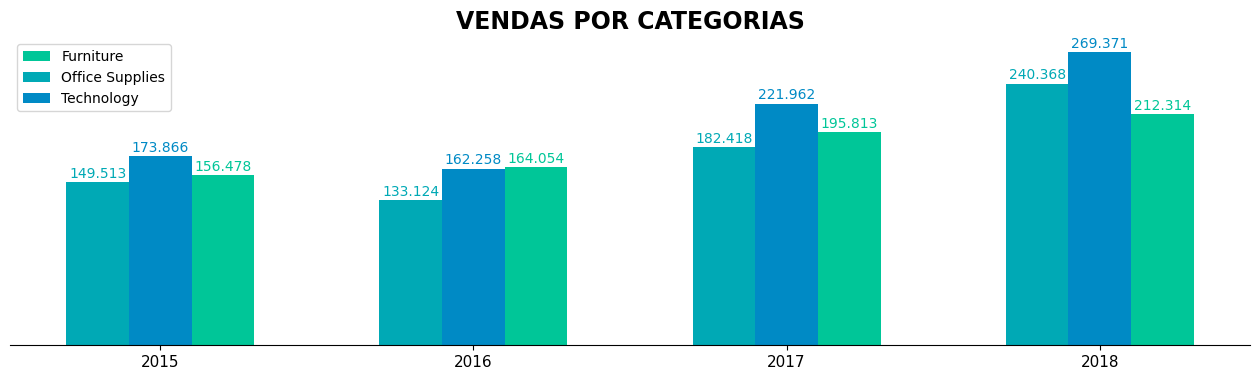

In [150]:
fig, ax = plt.subplots(figsize = (16, 4))
w = 0.2

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values + w, categoria[categoria.Category == 'Furniture'].Sales.values,
       color = '#00c698', label = 'Furniture', width = w)
ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values - w, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color = '#00a9b5', label = 'Office Supplies', width = w)
ax.bar(categoria[categoria.Category == 'Technology'].Ano.values, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color = '#008ac5', label = 'Technology', width = w)

for i in range(0, 4):
    ax.annotate('{:,.0f}'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]).replace(',', '.'),
                (categoria[categoria.Category == 'Furniture'].Ano.values[i] + w, 
                 categoria[categoria.Category == 'Furniture'].Sales.values[i]),
                ha = 'center',
                xytext = (0, 3), textcoords = 'offset points',
                fontsize = 10, color = '#00c698'
               )
for i in range(0, 4):
    ax.annotate('{:,.0f}'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]).replace(',', '.'),
                (categoria[categoria.Category == 'Technology'].Ano.values[i], 
                 categoria[categoria.Category == 'Technology'].Sales.values[i]),
                ha = 'center',
                xytext = (0, 3), textcoords = 'offset points',
                fontsize = 10, color = '#008ac5'
               )
for i in range(0, 4):
    ax.annotate('{:,.0f}'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]).replace(',', '.'),
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i] - w, 
                 categoria[categoria.Category == 'Office Supplies'].Sales.values[i]),
                ha = 'center',
                xytext = (0, 3), textcoords = 'offset points',
                fontsize = 10, color = '#00a9b5'
               )
ax.set_yticks([0, 3000])
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('VENDAS POR CATEGORIAS', fontsize = 17, fontweight = 'bold')

ax.xaxis.set_ticks([2015, 2016, 2017, 2018])
ax.tick_params(axis = 'x', labelsize = 11)


plt.legend()
plt.show()

#### - Item mais vendido

In [151]:
itens = base.groupby('Product Name')['Sales'].sum()
itens = itens.reset_index()
itens.head()

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [152]:
#Top 10 itens mais vendidos
itens = itens.sort_values('Sales', ascending = False)
n = 10
top_n_itens = itens.head(n)
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


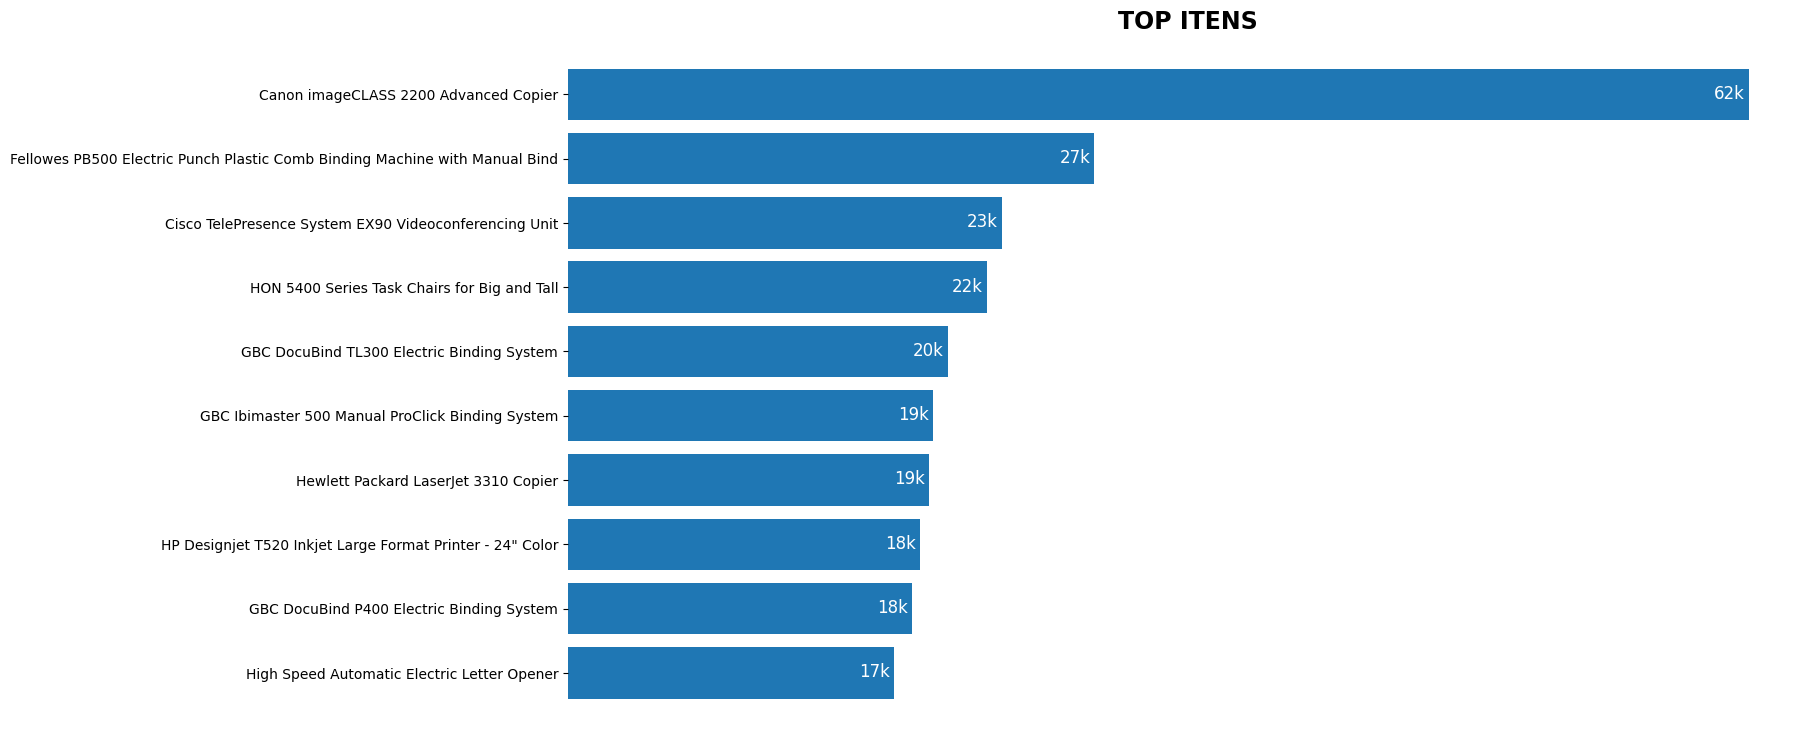

In [153]:
fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(top_n_itens['Product Name'].values, top_n_itens['Sales'].values, 
        align = 'center') #Passando os valores(y, x) e o alinhamento

ax.invert_yaxis() #Invertendo eixo y, para ficar do maior para o menor

for i in range(0, n):
    ax.annotate('{:,.0f}k'.format(top_n_itens['Sales'].values[i]/1000),
                (top_n_itens['Sales'].values[i], i),
                ha = 'center',
                xytext = (-14, -3), textcoords = 'offset points',
                fontsize = 12, color = 'white'
               )

ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.set_title('TOP ITENS', fontsize = 17, fontweight = 'bold')

plt.show()

In [154]:
#Itens por ano
itens_ano = base.groupby(['Product Name', 'Ano'])['Sales'].sum()
itens_ano = itens_ano.reset_index()
itens_ano

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [155]:
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


- Cruzando a base com todos os anos de 2015 a 2018

In [156]:
df_datas = pd.DataFrame([2018, 2017, 2016, 2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


In [157]:
n = 10
top_n_itens = itens.head(n)

In [158]:
#Criando coluna em comum com o mesmo valor
df_datas['uniao'] = 'unir'
itens['uniao'] = 'unir'

In [159]:
top_n_itens = itens.head(n)

In [160]:
produto_ano = pd.merge(
    top_n_itens, 
    df_datas, 
    how = 'outer',
    on = 'uniao') 

In [161]:
produto_ano.head()

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


In [162]:
itens_ano.head()

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502


In [163]:
itens_ano_grafico = pd.merge(
produto_ano, itens_ano, how = 'left', on = ['Product Name', 'Ano'])

In [164]:
itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


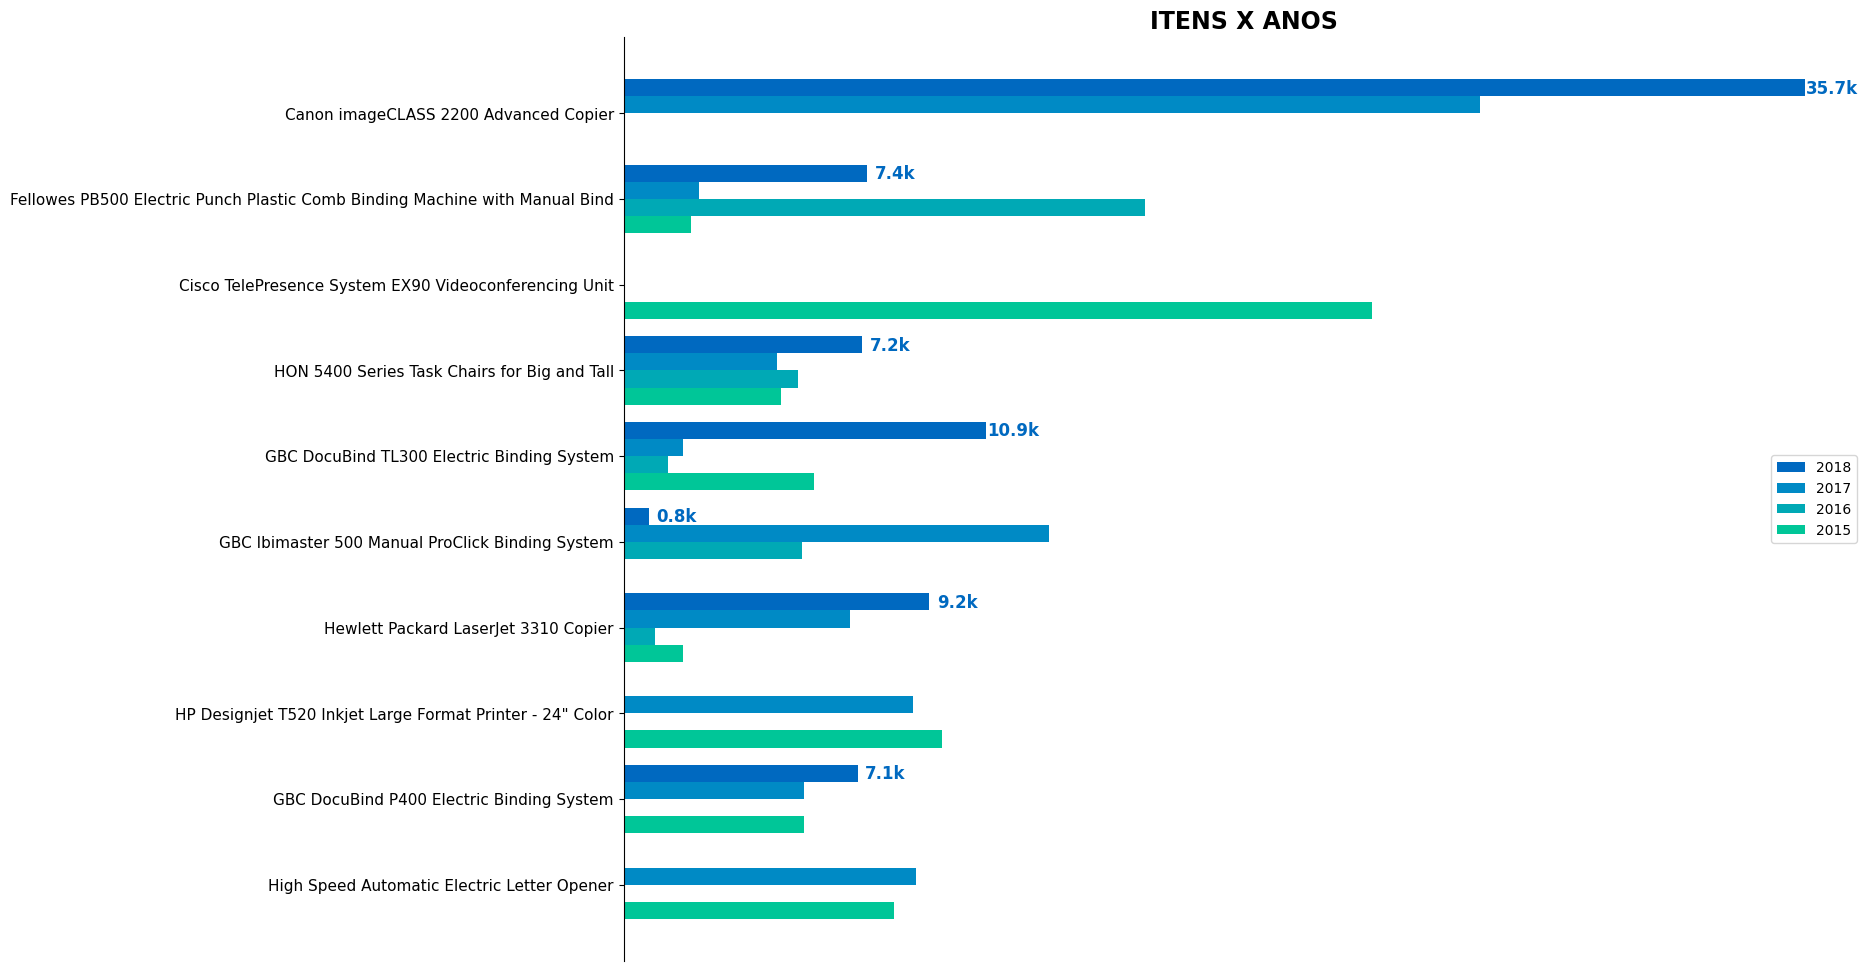

In [165]:
fig,ax = plt.subplots(figsize = (16,12))

hgt = 0.2
qtd_itens = len(top_n_itens)

ax.barh(np.arange(0,qtd_itens)- hgt -hgt/2,
       itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values,
       align='center',
       height=hgt,
       label=2018, color = '#0069c0'
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2,
       itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values,
       align='center',height = hgt,label=2017, color = '#008ac5')
ax.barh(np.arange(0,qtd_itens)+hgt/2,
       itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values,
       align='center',height = hgt,label=2016, color = '#00a9b5')
ax.barh(np.arange(0,qtd_itens)+hgt + hgt/2,
       itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values,
       align='center',height = hgt,label=2015, color = '#00c698')

for i in range(0, qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000),
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i], i-hgt-hgt/2),
                ha = 'center', va = 'top',
                xytext = (20, 6), textcoords = 'offset points', fontweight = 'bold',
                fontsize = 12, color = '#0069c0'
               )
    
ax.yaxis.set_ticks(np.arange(0, qtd_itens)) 
ax.set_yticklabels(top_n_itens['Product Name'])
ax.tick_params(axis = 'y', labelsize = 11)

ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('ITENS X ANOS', fontsize = 17, fontweight = 'bold')

ax.invert_yaxis()
ax.legend()

plt.show()